### Classification Models for Credit Scoring:

Development and deployment of supervised models where the target is binary.

The modeling table is already prepared and consists of:
- ID: A unique identifier.
- Explanatory variables: Features or independent variables.
- Batches:  time-based batches.
- Target: The response variable.


#### Importing Required Libraries (Predifined in GCP for POD)

In [ ]:
from PoDMLClassFunctions import *

-----------------------------------------------------------------------
PoDPlatform Classification Functions Loaded Successfully
Version: 1.0.3
Date: 21/07/21
Use HelpPodFunctions(fcn='functions') to check all functions available
-----------------------------------------------------------------------


In [ ]:
HelpPodFunctions(fcn='functions')

-------- Available Functions for Classification Models --------
PoDGetDatasets
PoDHoldoutSample
TuringTxEventVolumHist
PoDReadCSVFromGS
TuringOptimalBinning
TuringGetCategNullBin
TuringMissingPlot
TuringCSPlotCategSafra
TuringAgrupCategs
TuringGetListVars
TuringEventRateCategs
TuringUserDefinedRefCategLogisticReg
TuringLogisticRegression
TuringGetDummies
TuringDropVarsCoefRef
TuringCSKS
TuringCheckDummies
TuringLogisticRegScoreCard
TuringScorecardBetasRef
TuringKsSafra
TuringLinePlot
PoDGetNumericalFeatures
PoDGetCategoricalFeatures
PoDGetHighCardFeatures
PoDClassGini
PoDConfigClassDataPrep
PoDTrainingClassModels
PoDDeployClassModels
PoDScoringClassModelBatch
PoDRegisterProjetc


#### Reading Data from a CSV file stored in Google Storage

In [ ]:
abt00 = PoDReadCSVFromGS('gs://pod-artifacts-poc-br-dev/data/PoD_Platform_Binning_001.csv')

Number of rows:  100000
Number of variables:  18


In [ ]:
abt00 = abt00.sample(n=5000)
abt00.shape

(5000, 18)

In [ ]:
abt00.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
71751,443.93,1.0,443.93,1.000000,1.000000,12,122.50,1.000000,1.000000,0,1.000000,99999.0,NaN,1.000000,6.0,0,1340591,202001
80493,350.00,0.0,382.86,0.496861,0.500000,12,481.23,0.215275,0.333333,0,0.215275,0.5,2.0,0.500000,11.0,0,14174107,201903
2655,453.15,1.0,453.15,1.000000,0.833333,12,599.92,0.368344,0.833333,0,0.362113,99998.0,2.0,0.833333,0.0,0,2698161,201911
53233,821.14,1.0,821.14,1.000000,0.833333,12,232.56,0.374491,0.833333,0,0.374490,99999.0,NaN,0.833333,12.0,0,31414666,201912
91141,1389.39,1.0,1389.39,1.000000,1.000000,4,1991.57,1.000000,1.000000,0,1.000000,99998.0,9.0,0.333333,0.0,0,35120410,201910


#### Checking the event rate by BATCH


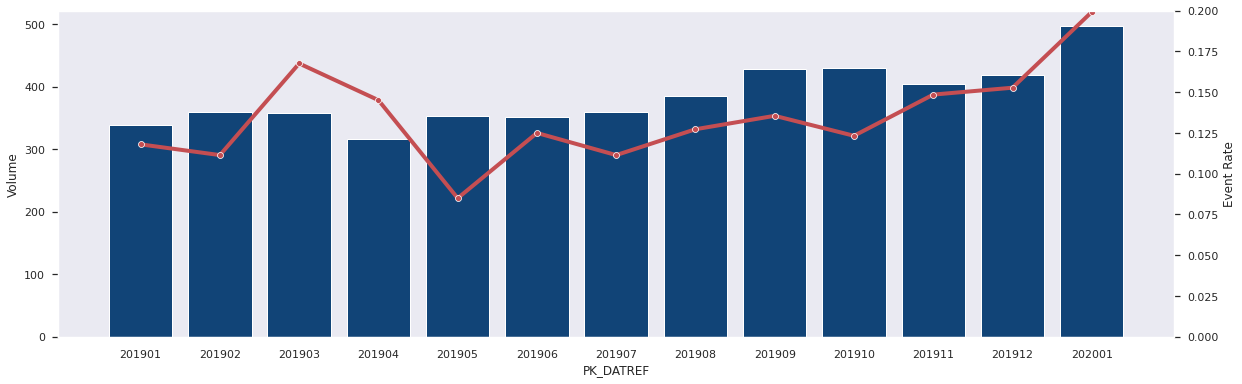

In [ ]:
stasafrat = TuringTxEventVolumHist(abt00,'TARGET_60_6','PK_DATREF')

#### Defining project parameters

In [ ]:
#### Definindo parâmetros do projeto
project_name = 'CreditScore_v001'
modelname = 'CREDIT_SCORE_002'
model_description = "Modelo para crédito - teste"
idmodels = ['lightgbm','xgboost','gbc','lr','rf']
sort='Gini'
targetname = 'TARGET_60_6'
idlist = ['PK_ID']
ignore_variables = []
bin_numeric_features = None
optimize = 'AUC'
train_size = 0.7
kfold = 5
njobs = 10
normalize = True
normalize_method = 'zscore' #available: zscore minmax maxabs robust
ignore_low_variance = True
combine_rare_levels =  True
remove_outliers = True
outliers_threshold = 0.05
remove_multicollinearity =  True
multicollinearity_threshold = 0.9
remove_perfect_collinearity = True
find_subpops = False
polynomial_features = False
polynomial_degree = 2
feature_selection = True
feature_selection_threshold = 0.1
feature_interaction = False
feature_ratio = False
interaction_threshold = 0.01
fix_imbalance = False
enable_high_card_feat = False
card_threshold = 20
seedproj = 12345

#### Using cross-validation by Hold-Out with 70% reserved for training and 30% for testing

In [ ]:
train, test = PoDHoldoutSample(abt00,train_frac=0.7,seed=seedproj)

Data for Modeling: (3500, 18)
Unseen Data For Predictions (Validation/Test): (1500, 18)


In [ ]:
train.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
0,303.88,1.000000,303.88,1.000000,1.000000,8,244.32,1.000000,1.000000,0,1.000000,99998.0,3.0,0.666667,1.0,0,6833803,201911
1,54.00,1.000000,53.80,1.000000,1.000000,4,46.66,1.000000,1.000000,4,1.000000,99998.0,3.0,0.666667,0.0,0,9932682,201908
2,190.22,0.333333,860.91,0.220952,0.250000,12,1500.95,0.220952,0.333333,0,0.220952,99997.0,NaN,0.250000,2.0,1,4191107,201910
3,1014.82,1.000000,1014.82,1.000000,0.916667,12,3055.18,1.000000,1.000000,0,1.000000,99998.0,9.0,0.916667,2.0,0,2196319,201906
4,34.64,1.000000,34.64,1.000000,0.833333,12,0.00,1.000000,1.000000,0,0.127603,99999.0,NaN,0.833333,3.0,0,27335719,201901


In [ ]:
StartModel = PoDComputeStarFinishProcess(start=True,end=False)
StartModel

'20210910-10:21:05'

#### Applying data preparation

In [ ]:
ConfigProj,X_train,used_features,listxsv,train_selvar = PoDConfigClassDataPrep(
                                                                               train,
                                                                               train_size,
                                                                               targetname,
                                                                               idlist,
                                                                               ignore_variables,
                                                                               enable_high_card_feat,
                                                                               card_threshold,
                                                                               normalize,
                                                                               normalize_method,
                                                                               ignore_low_variance,
                                                                               combine_rare_levels,
                                                                               bin_numeric_features,
                                                                               remove_outliers,
                                                                               outliers_threshold,
                                                                               remove_multicollinearity,
                                                                               multicollinearity_threshold,
                                                                               remove_perfect_collinearity,
                                                                               find_subpops,
                                                                               polynomial_features,
                                                                               polynomial_degree,
                                                                               feature_selection,
                                                                               feature_selection_threshold,
                                                                               feature_interaction,
                                                                               feature_ratio,
                                                                               interaction_threshold,
                                                                               fix_imbalance,
                                                                               kfold,
                                                                               njobs,
                                                                               seedproj
                                                                              )

,Description,Value
0,session_id,12345
1,Target,TARGET_60_6
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3500, 18)"
5,Missing Values,True
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
X_train.head()

,VAR_7,VAR_5,VAR_3,VAR_2,VAR_1
916,0.818083,0.727757,0.684783,0.554103,1.002053
347,-0.322710,-0.251360,0.844527,0.554103,1.183360
3213,-0.805026,0.727757,-1.065464,0.554103,-0.984454
446,1.585594,0.727757,0.951085,0.554103,1.304302
821,-0.550342,0.727757,-0.274928,0.554103,-0.087206


In [ ]:
train_selvar.head()

,PK_ID,VAR_7,VAR_5,VAR_3,VAR_2,VAR_1,TARGET_60_6
0,6833803,244.32,1.000000,303.88,1.000000,303.88,0
1,9932682,46.66,1.000000,53.80,1.000000,54.00,0
2,4191107,1500.95,0.250000,860.91,0.333333,190.22,1
3,2196319,3055.18,0.916667,1014.82,1.000000,1014.82,0
4,27335719,0.00,0.833333,34.64,1.000000,34.64,0


#### Training Models

In [ ]:
best_model,model_comp,tuned_mdl,tunedmodl = PoDTrainingClassModels(idmodels,sort,kfold,optimize)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,KS,Gini
0,0.8069,0.7549,0.6182,0.3301,0.4304,0.3268,0.3501,0.4800,0.5098
1,0.7892,0.7460,0.6545,0.3130,0.4235,0.3137,0.3457,0.4700,0.4920
2,0.8344,0.8035,0.5818,0.3721,0.4539,0.3618,0.3744,0.4800,0.6070
3,0.7785,0.7692,0.6909,0.3065,0.4246,0.3118,0.3514,0.5100,0.5384
4,0.7763,0.7895,0.6545,0.2975,0.4091,0.2943,0.3292,0.4600,0.5790
Mean,0.7971,0.7726,0.6400,0.3238,0.4283,0.3217,0.3502,0.4800,0.5452
SD,0.0216,0.0213,0.0371,0.0264,0.0146,0.0226,0.0145,0.0167,0.0426


In [ ]:
FinishModel = PoDComputeStarFinishProcess(start=False,end=True)
FinishModel

'20210910-10:21:39'

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_comp

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,KS,Gini,TT (Sec)
lr,Logistic Regression,0.8921,0.7669,0.1964,0.6566,0.3008,0.2600,0.3173,0.482,0.5338,0.720
gbc,Gradient Boosting Classifier,0.8861,0.7668,0.2473,0.5367,0.3371,0.2845,0.3106,0.476,0.5336,0.784
rf,Random Forest Classifier,0.8938,0.7534,0.2545,0.6227,0.3602,0.3137,0.3517,0.444,0.5068,0.812
lightgbm,Light Gradient Boosting Machine,0.8925,0.7458,0.3055,0.5933,0.3994,0.3475,0.3723,0.418,0.4916,0.802
xgboost,Extreme Gradient Boosting,0.8878,0.7373,0.3055,0.5521,0.3886,0.3331,0.3528,0.408,0.4745,0.850


In [ ]:
tuned_mdl

LogisticRegression(C=9.939, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tunedmodl

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,KS,Gini
0,0.8069,0.7549,0.6182,0.3301,0.4304,0.3268,0.3501,0.4800,0.5098
1,0.7892,0.7460,0.6545,0.3130,0.4235,0.3137,0.3457,0.4700,0.4920
2,0.8344,0.8035,0.5818,0.3721,0.4539,0.3618,0.3744,0.4800,0.6070
3,0.7785,0.7692,0.6909,0.3065,0.4246,0.3118,0.3514,0.5100,0.5384
4,0.7763,0.7895,0.6545,0.2975,0.4091,0.2943,0.3292,0.4600,0.5790
Mean,0.7971,0.7726,0.6400,0.3238,0.4283,0.3217,0.3502,0.4800,0.5452
SD,0.0216,0.0213,0.0371,0.0264,0.0146,0.0226,0.0145,0.0167,0.0426


#### Graphical evaluation of models

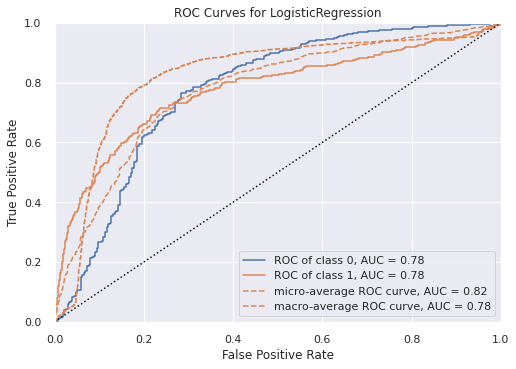

In [ ]:
plot_model(tuned_mdl, plot = 'auc',use_train_data = True)

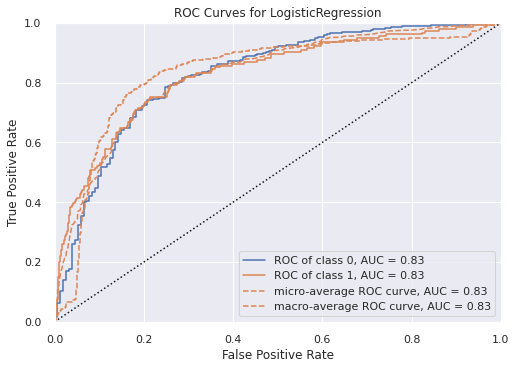

In [ ]:
plot_model(tuned_mdl, plot = 'auc',use_train_data = False)

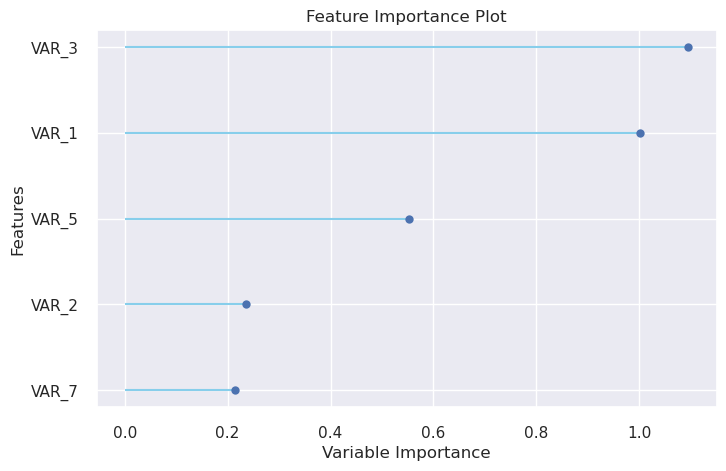

In [ ]:
plot_model(tuned_mdl, plot='feature')

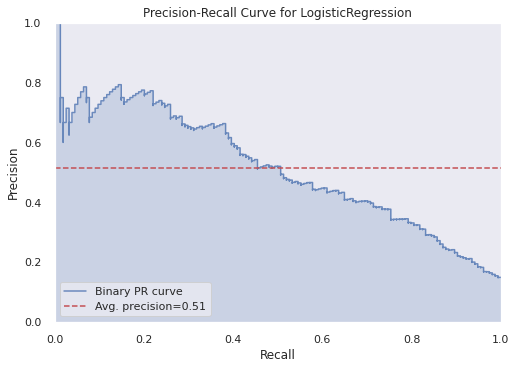

In [ ]:
plot_model(tuned_mdl, plot = 'pr')

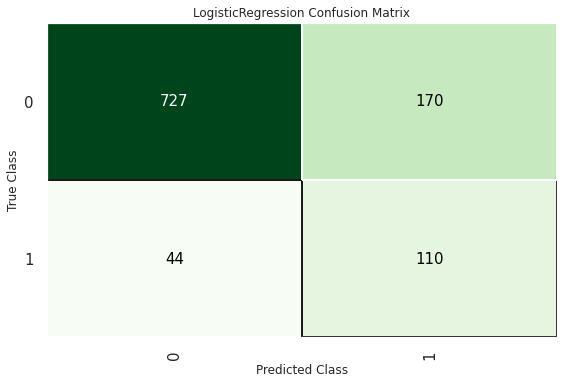

In [ ]:
plot_model(tuned_mdl, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_mdl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Model Deployment

In [ ]:
idProj = PoDDeployClassModels(tuned_mdl,modelname,train,model_comp,ConfigProj,tunedmodl,train_selvar,X_train)

Transformation Pipeline and Model Succesfully Saved
Saving model package:  20210910-10:21:41-69ded36303daa2e02e51f5a49c64952a
File CREDIT_SCORE_002.pkl uploaded to artifacts/20210910-10:21:41-69ded36303daa2e02e51f5a49c64952a/CREDIT_SCORE_002.pkl.


#### Verifying the Deployed Model (Per Batch)

In [ ]:
model = load_model(modelname)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
scored_train = predict_model(model, data=train,raw_score=True)

In [ ]:
scored_test = predict_model(model, data=test,raw_score=True)

In [ ]:
scored_train.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF,Label,Score_0,Score_1
0,303.88,1.000000,303.88,1.000000,1.000000,8,244.32,1.000000,1.000000,0,...,99998.0,3.0,0.666667,1.0,0,6833803,201911,0,0.7394,0.2606
1,54.00,1.000000,53.80,1.000000,1.000000,4,46.66,1.000000,1.000000,4,...,99998.0,3.0,0.666667,0.0,0,9932682,201908,0,0.7447,0.2553
2,190.22,0.333333,860.91,0.220952,0.250000,12,1500.95,0.220952,0.333333,0,...,99997.0,NaN,0.250000,2.0,1,4191107,201910,1,0.0177,0.9823
3,1014.82,1.000000,1014.82,1.000000,0.916667,12,3055.18,1.000000,1.000000,0,...,99998.0,9.0,0.916667,2.0,0,2196319,201906,0,0.5274,0.4726
4,34.64,1.000000,34.64,1.000000,0.833333,12,0.00,1.000000,1.000000,0,...,99999.0,NaN,0.833333,3.0,0,27335719,201901,0,0.6317,0.3683


In [ ]:
filescore = 'gs://pod-artifacts-poc-br-dev/artifacts/20210901-15:20:58-0d7e9ea1f36c096b930aa70dca7014f3/train_dataset.csv'
Score_FULL = PoDScoringClassModelBatch(model=model,path_filescore=filescore,idlist=idlist,chunksize=2000)

Dataset rows:  3500
Scoring dataset part :  1 / 2
Estimated time :  0.02 minutes
Scoring dataset part :  2 / 2
Estimated time :  0.0 minutes


In [ ]:
Score_FULL.head()

,PK_ID,Score_0,Score_1,PK_DATVER
0,33813008,0.0069,0.9931,20210901-15:21:39
1,17662710,0.9844,0.0156,20210901-15:21:39
2,8533245,0.5823,0.4177,20210901-15:21:39
3,28212144,0.7041,0.2959,20210901-15:21:39
4,32529824,0.4515,0.5485,20210901-15:21:39


#### Calculating the KS (Kolmogorov-Smirnov) of the Model

In [ ]:
ks_train = TuringCSKS(scored_train[targetname], scored_train['Score_1'])
ks_train

0.51

#### Calculating the KS of the Model per Batch

In [ ]:
ks_safra = TuringKsSafra(scored_train,'PK_DATREF','Score_1',targetname)

Ks value (201901):  0.56
Ks value (201902):  0.61
Ks value (201903):  0.54
Ks value (201904):  0.51
Ks value (201905):  0.63
Ks value (201906):  0.47
Ks value (202001):  0.6
Ks value (201908):  0.5
Ks value (201907):  0.49
Ks value (201910):  0.54
Ks value (201911):  0.48
Ks value (201912):  0.54
Ks value (201909):  0.62


#### Calculating the Gini Coefficient of the Model

In [ ]:
gini = PoDClassGini(scored_train[targetname], scored_train['Score_1'])
gini

0.6086

Calculating the Gini Coefficient of the Model per Batch

In [ ]:
gini_safra = []
safra_vec = []
for safra in scored_train.PK_DATREF.unique():
    df = scored_train[(scored_train["PK_DATREF"] == safra)]
    gini = PoDClassGini(df[targetname], df['Score_1'])
    print('Gini: ',safra, ' --> ',gini)
    gini_safra.append(gini)
    safra_vec.append(safra)


Gini:  201911  -->  0.527
Gini:  201908  -->  0.5844
Gini:  201910  -->  0.511
Gini:  201906  -->  0.5606
Gini:  201901  -->  0.6252
Gini:  201902  -->  0.7398
Gini:  201903  -->  0.5818
Gini:  201912  -->  0.6262
Gini:  201905  -->  0.672
Gini:  202001  -->  0.6888
Gini:  201907  -->  0.5442
Gini:  201909  -->  0.6896
Gini:  201904  -->  0.5226
